# Multi-Class Image Classification CNN - Flower Recognition

## Goal : To build a Convolution Neural Network to classify the type of flowers from a total of 5 different categories

## About the dataset

The dataset contains 4242 images of flowers collected from data flicr, yandex images, pintrest, google images.
All of the images are divided into five categories, namely : chamomile, tulip, rose, sunflower, dandelion. Each image has a resolution of 320 X 240

## Deep Learning Pipeline



* Importing required libraries
* Data Exploration
* Initializing the CNN - adding Convolution, Max Pooling, Flattening Layers
* Applying Image Augmentation 
* Training the CNN on the images
* Evaluating Model Performance

### - Importing required libraries

In [61]:
# Importing the Keras libraries and packages
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
import random as random
import os as os
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

### - Data Exploration

In [65]:
daisy_dir='C:/Users/aashi/Desktop/dataset/training/daisy'
sunflower_dir='C:/Users/aashi/Desktop/dataset/training/sunflower'
tulip_dir='C:/Users/aashi/Desktop/dataset/training/tulip'
dandi_dir='C:/Users/aashi/Desktop/dataset/training/dandelion'
rose_dir ='C:/Users/aashi/Desktop/dataset/training/rose'

In [66]:
IMG_SIZE= 150
predicters = []
target = []

In [67]:
def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":
       
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
            predicters.append(np.array(image))
            target.append(str(label))

read_image("Daisy",daisy_dir)
read_image("Sunflower",sunflower_dir)
read_image("Tulip",tulip_dir)
read_image("Dandelion",dandi_dir)
read_image("Rose",rose_dir)

100%|██████████| 627/627 [00:03<00:00, 172.40it/s]


In [68]:
len(predicters),len(target)

(3458, 3458)

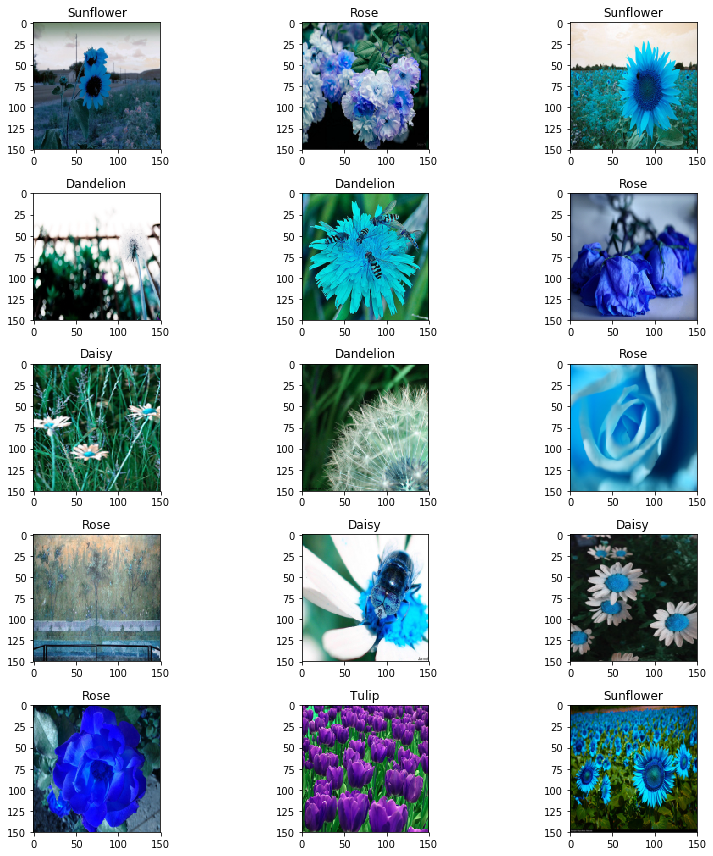

In [69]:
#Display few images

fig,ax = plt.subplots(5,3)
fig.set_size_inches(12,12)

for i in range(5):
    for j in range(3):
        l = random.randint(0,len(target))
        ax[i,j].imshow(predicters[l])
        ax[i,j].set_title(target[l])
        
plt.tight_layout()

### - Initializing the CNN - adding Convolution, Max Pooling, Flattening Layers

In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (320, 240, 3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

In [7]:
# Step 4 - Full connection
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'sigmoid'))

In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


### - Applying Image Augmentation technique

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(r'C:\Users\aashi\Desktop\dataset\training',
                                                 target_size = (320, 240),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3458 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory(r'C:\Users\aashi\Desktop\dataset\test',
                                            target_size = (320, 240),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 865 images belonging to 5 classes.


### - Training the CNN on the images

In [14]:
cnn = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
50/50 [==============================] - 138s 3s/step - loss: 0.7703 - accuracy: 0.7820 - val_loss: 0.4956 - val_accuracy: 0.7972
Epoch 2/50
50/50 [==============================] - 141s 3s/step - loss: 0.4232 - accuracy: 0.8045 - val_loss: 0.4030 - val_accuracy: 0.8087
Epoch 3/50
50/50 [==============================] - 145s 3s/step - loss: 0.4034 - accuracy: 0.8111 - val_loss: 0.3783 - val_accuracy: 0.8130
Epoch 4/50
50/50 [==============================] - 150s 3s/step - loss: 0.3816 - accuracy: 0.8264 - val_loss: 0.4122 - val_accuracy: 0.8105
Epoch 5/50
50/50 [==============================] - 153s 3s/step - loss: 0.3661 - accuracy: 0.8281 - val_loss: 0.4742 - val_accuracy: 0.8127
Epoch 6/50
50/50 [==============================] - 151s 3s/step - loss: 0.3679 - accuracy: 0.8361 - val_loss: 0.4435 - val_accuracy: 0.8205
Epoch 7/50
50/50 [==============================] - 152s 3s/step - loss: 0.3468 - accuracy: 0.8456 - val_l

### - Evaluating Model Performance

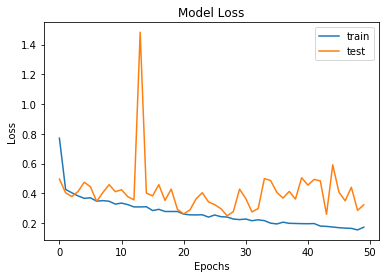

In [15]:
#model loss
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

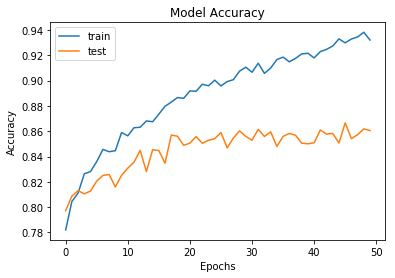

In [16]:
#model accuracy
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Hence we can see from the above graph that we end up with an accuracy of 86%

In [18]:
#Predicting the class of test set images
pred=classifier.predict_generator(test_set) #,verbose=1,steps=306/32)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_set.filenames

results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [70]:
print(results)

                               Filename Predictions
0    daisy\18684594849_7dd3634f5e_n.jpg       tulip
1      daisy\18711159980_11d3bd5042.jpg   dandelion
2      daisy\18901817451_43e2b45f6c.jpg        rose
3    daisy\19019544592_b64469bf84_n.jpg   sunflower
4      daisy\19177263840_6a316ea639.jpg       tulip
5      daisy\19178753159_a471bf4b6b.jpg       daisy
6    daisy\19280272025_57de24e940_m.jpg        rose
7    daisy\19527362416_8bdcbefb8b_n.jpg       tulip
8    daisy\19544831049_0d738d4872_m.jpg       tulip
9    daisy\19653086178_28156b7ce4_m.jpg        rose
10   daisy\19813618946_93818db7aa_m.jpg       daisy
11     daisy\19834392829_7d697871f6.jpg   dandelion
12   daisy\19865728236_a62f8f445b_n.jpg   dandelion
13   daisy\19975899671_ebc42b7865_n.jpg       daisy
14     daisy\20182559506_40a112f762.jpg   dandelion
15     daisy\20289938802_e16fa9f23d.jpg   sunflower
16     daisy\20329326505_a777c71cc2.jpg        rose
17   daisy\20580471306_ab5a011b15_n.jpg        rose
18     daisy

# THE END